In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime

In [2]:
df = pd.read_csv('data/clean_data.csv', index_col=0)
df.head()

,date,open,high,low,close,volume,symbol
0,2019-10-07,16.38,16.46,16.28,16.3049,6997796.0,SLV
1,2019-10-04,16.30,16.46,16.25,16.4100,17178596.0,SLV
2,2019-10-03,16.38,16.65,16.37,16.4300,24412700.0,SLV
3,2019-10-02,16.33,16.54,16.27,16.4300,21300800.0,SLV
4,2019-10-01,15.96,16.21,15.91,16.1500,23278100.0,SLV


In [3]:
df.symbol.unique()
df.date = pd.to_datetime(df.date)
df.date.dtype

dtype('<M8[ns]')

,date,open,high,low,close,volume,symbol
0,2019-10-07,16.38,16.46,16.28,16.3049,6997796.0,SLV
1,2019-10-04,16.30,16.46,16.25,16.4100,17178596.0,SLV
2,2019-10-03,16.38,16.65,16.37,16.4300,24412700.0,SLV
3,2019-10-02,16.33,16.54,16.27,16.4300,21300800.0,SLV
4,2019-10-01,15.96,16.21,15.91,16.1500,23278100.0,SLV


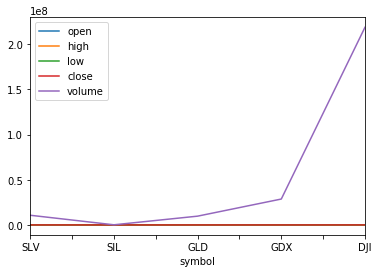

In [11]:
df.groupby(pd.Grouper(key='symbol')).mean().plot()
df.head()

In [5]:
df_crisis = df.loc[(df['date'] > '2007-01-01') & (df['date'] < '2009-01-01')]

In [6]:
df_crisis['date']= pd.to_datetime(df_crisis['date'])

/Users/alyssaliguori/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df_crisis.head()


,date,close
2709,2008-12-31,11.20
2710,2008-12-30,10.82
2711,2008-12-29,10.77
2712,2008-12-26,10.64
2713,2008-12-24,10.28


In [8]:
#df_crisis.groupby(pd.Grouper(key='date',freq='M')).mean()

In [9]:
df_crisis = df_crisis.loc[(df_crisis['symbol']=='GLD')|(df_crisis['symbol']=='GDX')|(df_crisis['symbol']=='DJI')]

KeyError: 'symbol'

In [ ]:
df_gld = df_crisis.loc[(df_crisis['symbol']== 'GLD')]
df_gdx = df_crisis.loc[(df_crisis['symbol']== 'GDX')]
df_dji = df_crisis.loc[(df_crisis['symbol'] == 'DJI')]
df_dji.symbol.unique()

In [ ]:
# resample by month for GLD
df_gld_mo = df_gld.resample('M',on='date').mean()
df_gld_mo.index = df_gld_mo.index.map(lambda x: x.strftime('%m-%y'))
df_gld_mo.head()

In [ ]:
# same for GDX 
df_gdx_mo = df_gdx.resample('M',on='date').mean()
df_gdx_mo.index = df_gdx_mo.index.map(lambda x: x.strftime('%m-%y'))
df_dji_mo.describe()

In [ ]:
# same for DJI
df_dji_mo = df_dji.resample('M',on='date').mean()
df_dji_mo.index = df_dji_mo.index.map(lambda x: x.strftime('%m-%y'))
df_dji_mo.head()

In [ ]:
df_merged = df_gld_mo.join(df_gdx_mo, lsuffix='_gld',rsuffix='_gdx' )
df_merged.head()

In [ ]:
label_list = []

for i in df_gld_mo.index:
    label_list.append(i);
label_list;

In [12]:
ax1 =sns.lineplot(x= df.index, y='close_gld', data=df, color='darkgreen')
plt.title('GLD and GDX Average Closing Price by Month During the Financial Crisis',wrap=True)
plt.xlabel('Month-Year')
ax2=sns.lineplot(x=df.index, y='close_gdx', data=df, color='lightgreen')
ax3 = ax1.twinx()
ax3 = sns.lineplot(x=df_dji_mo.index, y='close', data=df_dji_mo, color='lightgrey')
ax1.set_xticklabels(labels=label_list,rotation=90)
ax1.set_ylabel('avg. close ($) for GLD and GDX', size=10)
ax3.set_ylabel('avg. close ($) for market index', size = 10, color='lightgrey')
ax3.tick_params(axis='y', colors='lightgrey')
ax2.legend(labels=['GLD','GDX'])
plt.tight_layout()
plt.show()

ValueError: Could not interpret input 'close_gld'

In [ ]:
# find change in mean from month to month for GLD
df_xs_gld = df_gld_mo[['close']]
df_xs_gld.head()
df_xs_gdx = df_gdx_mo[['close']]
df_xs_gdx.head()
df_xs_dji = df_dji_mo[['close']]
df_xs_dji.head()
df_xs_gld.mean()

In [ ]:
df_gld_pc = df_xs_gld.pct_change(axis='rows')
df_gld_pc.head()
df_gdx_pc = df_xs_gdx.pct_change(axis='rows')
df_gdx_pc.head()
df_dji_pc = df_xs_dji.pct_change(axis='rows')
df_gdx_pc

In [ ]:
ax1 =sns.lineplot(x= df_gld_pc.index, y='close', data=df_gld_pc, color='darkgreen')
plt.title('DJI, GLD, and GDX Percent Change in Avg. Closing Price by Month During the Financial Crisis', wrap=True)
plt.xlabel('Month-Year')
ax2=sns.lineplot(x=df_gdx_pc.index, y='close', data=df_gdx_pc, color='lightgreen')
ax3 = sns.lineplot(x=df_dji_pc.index, y='close', data=df_dji_pc, color='lightgrey')
ax1.set_xticklabels(labels=label_list,rotation=90)
ax1.set_ylabel('avg. close ($) for GLD and GDX', size=10)
ax1.legend(labels=['GLD','GDX','DJI'])
plt.tight_layout()
plt.show()


In [ ]:
repeated anova 
chisquared
            ticker 
months - volumes

collinearity 


y = a